In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("cleaned_sales_data.csv")
df.head()

,order_id,date,product,category,price,quantity,total_sales,customer,region,salesperson
0,1450,2024-07-04,Washing Machine,Home Appliances,931.0,4.0,3724.0,Joseph,West,Mark
1,1369,2024-06-17,Vacuum Cleaner,Home Appliances,1106.0,5.0,5530.0,Jesse,West,Lisa
2,1056,2024-06-29,Laptop,Electronics,717.0,1.0,717.0,Andrew,South,Michael
3,1470,2024-08-19,TV,Electronics,1416.0,2.0,2832.0,Stephen,North,Emily
4,1348,2024-04-13,Blender,Home Appliances,928.0,2.0,1856.0,Raymond,East,Emily


In [7]:
# Total Revenue
total_revenue = df['total_sales'].sum()
total_revenue

983671.0

In [34]:
#Monthly Sales Trends
df["date"] = pd.to_datetime(df["date"])
df['month'] = df['date'].dt.to_period('M')
monthly_sales = df.groupby('month')['total_sales'].sum()


In [21]:
# Top 5 Products
top_products = df.groupby('product')['total_sales'].sum().nlargest(5)
top_products

product
Jeans             82518.0
Jacket            81963.0
Laptop            75233.0
Blender           75197.0
Vacuum Cleaner    74505.0
Name: total_sales, dtype: float64

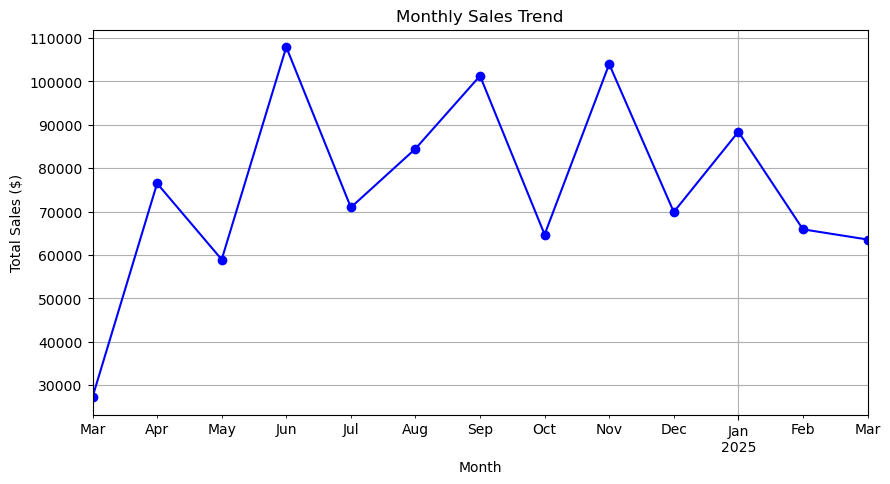

In [36]:
# Plot Monthly Sales Trends

plt.figure(figsize=(10,5))
monthly_sales.plot(kind="line", marker="o", color="blue")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.grid()
plt.show()



Sales by Region:
 region
North    261399.0
West     255742.0
East     241617.0
South    224913.0
Name: total_sales, dtype: float64

Sales by Product Category:
 category
Electronics        288211.0
Fashion            353361.0
Home Appliances    342099.0
Name: total_sales, dtype: float64

Top Salespersons:
 salesperson
Emily      219863.0
John       203107.0
Mark       191686.0
Lisa       185595.0
Michael    183420.0
Name: total_sales, dtype: float64


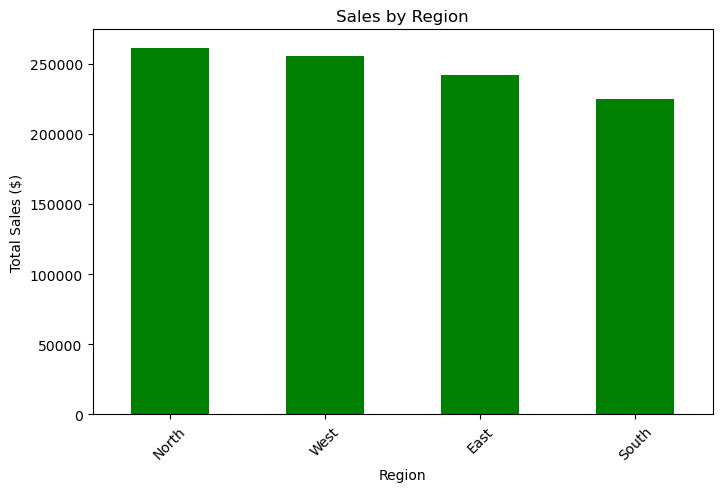

In [38]:
# **Sales by Region**
sales_by_region = df.groupby("region")["total_sales"].sum().sort_values(ascending=False)
print("\nSales by Region:\n", sales_by_region)

# **Sales by Product Category**
sales_by_category = df.groupby("category")["total_sales"].sum()
print("\nSales by Product Category:\n", sales_by_category)

# **Sales by Salesperson**
sales_by_salesperson = df.groupby("salesperson")["total_sales"].sum().sort_values(ascending=False)
print("\nTop Salespersons:\n", sales_by_salesperson)

# Plot Sales by Region
plt.figure(figsize=(8,5))
sales_by_region.plot(kind="bar", color="green")
plt.title("Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()


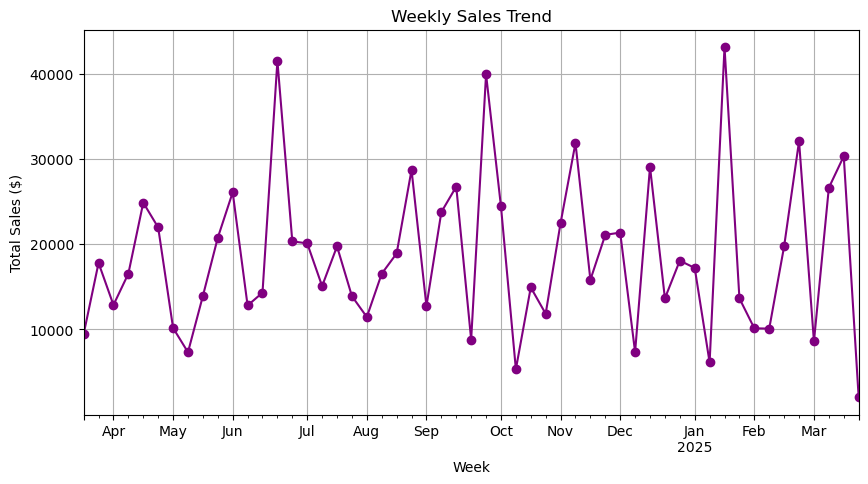


Customer Distribution by Region:
 customer
Aaron               [South]
Adam                 [East]
Adrian        [South, West]
Alan                 [West]
Alejandro            [West]
Alex                [South]
Alexander            [East]
Alexandria           [West]
Alexis              [North]
Alicia               [West]
Name: region, dtype: object


In [43]:
# **Weekly Sales Trends**
df["week"] = df["date"].dt.to_period("W")
weekly_sales = df.groupby("week")["total_sales"].sum()

# **Quarterly Sales Trends**
df["quarter"] = df["date"].dt.to_period("Q")
quarterly_sales = df.groupby("quarter")["total_sales"].sum()

# Plot Weekly Sales Trends
plt.figure(figsize=(10,5))
weekly_sales.plot(kind="line", marker="o", color="purple")
plt.title("Weekly Sales Trend")
plt.xlabel("Week")
plt.ylabel("Total Sales ($)")
plt.grid()
plt.show()

# **Customer Demographics (Sales by Region)**
customer_distribution = df.groupby("customer")["region"].unique()
print("\nCustomer Distribution by Region:\n", customer_distribution.head(10))



Best-Selling Products:
 product
Jeans             82518.0
Jacket            81963.0
Laptop            75233.0
Blender           75197.0
Vacuum Cleaner    74505.0
Name: total_sales, dtype: float64

Low-Selling Products:
 product
Tablet             39343.0
Phone              46822.0
Hat                55377.0
Headphones         57506.0
Washing Machine    58908.0
Name: total_sales, dtype: float64

Products Running Low on Stock:
              product  stock_level
11            Laptop           17
14             Phone           12
16            Jacket           17
40            Tablet           19
43        Headphones           15
48    Vacuum Cleaner           12
57           T-shirt           19
61             Jeans           19
77               Hat           15
80            Jacket           10
88             Phone           19
98    Vacuum Cleaner           15
116            Jeans           11
122               TV           15
147           Jacket           11
154   Vacuum Cleaner     

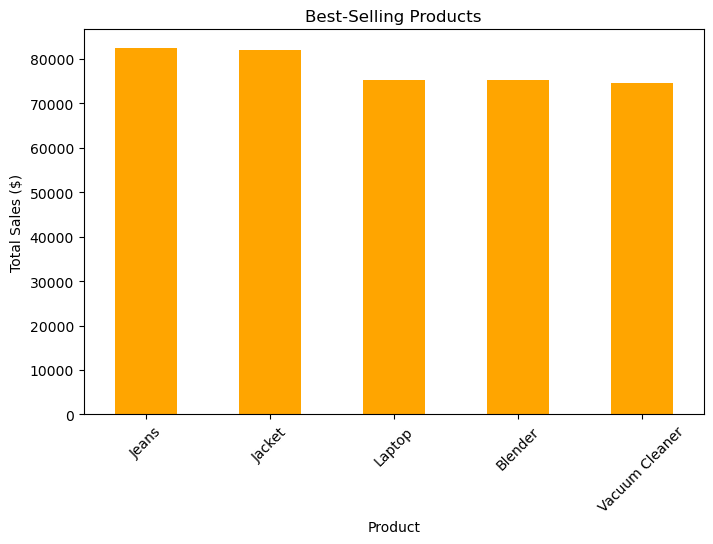

In [45]:
# **Best-Selling Products**
best_selling_products = df.groupby("product")["total_sales"].sum().nlargest(5)
print("\nBest-Selling Products:\n", best_selling_products)

# **Low-Selling Products**
low_selling_products = df.groupby("product")["total_sales"].sum().nsmallest(5)
print("\nLow-Selling Products:\n", low_selling_products)

# Simulating stock levels
import numpy as np
df["stock_level"] = np.random.randint(10, 100, size=len(df))

# **Products Running Low on Stock (Threshold < 20)**
low_stock_products = df[df["stock_level"] < 20][["product", "stock_level"]]
print("\nProducts Running Low on Stock:\n", low_stock_products)

# Plot Best & Low Selling Products
plt.figure(figsize=(8,5))
best_selling_products.plot(kind="bar", color="orange")
plt.title("Best-Selling Products")
plt.xlabel("Product")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()
